In [ ]:
# How to Remove Outliers for Machine Learning

by Jason Brownlee on June 30, 2020. [Reference](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data)


## Tutorial Overview
This tutorial is divided into five parts; they are:

- 1. What are Outliers?
- 2. Test Dataset
- 3. Standard Deviation Method
- 4. Interquartile Range Method
- 5. Automatic Outlier Detection: LocalOutlierFactor
- 6. Automatic Outlier Detection: IsolationForest

In [ ]:
## 1. What are Outliers?
An outlier is an observation that is unlike the other observations.

It is rare, or distinct, or does not fit in some way.

We will generally define outliers as samples that are exceptionally far from the mainstream of the data.

Outliers can have many causes, such as:

- Measurement or input error.
- Data corruption.
- True outlier observation 

There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.

## 2. Test Dataset
We will generate a population 10,000 random numbers drawn from a Gaussian distribution with a mean of 50 and a standard deviation of 5.

Numbers drawn from a Gaussian distribution will have outliers. That is, by virtue of the distribution itself, there will be a few values that will be a long way from the mean, rare values that we can identify as outliers.

We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.

In [1]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(10000) + 50

# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


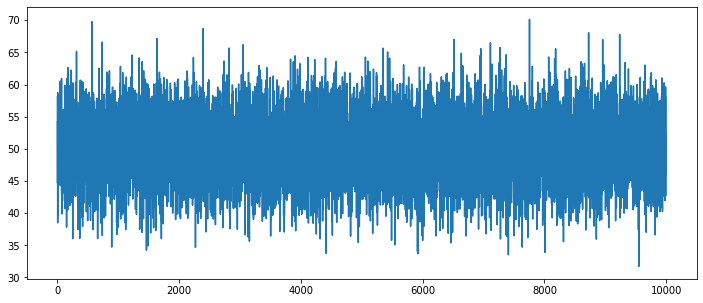

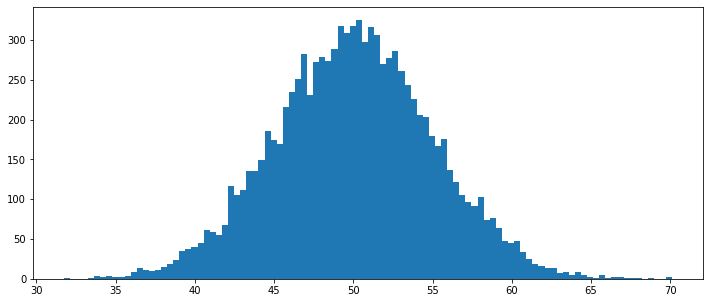

In [12]:
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

rcParams['figure.figsize'] = 12, 5
plt.plot(data)
plt.show()

plt.hist(data, bins = 100)
plt.show()

## 3. Standard Deviation Method

If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

if the mean is 50 and the standard deviation is 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68% of the data sample. We can cover more of the data sample if we expand the range as follows:

- 1 Standard Deviation from the Mean: 68%
- 2 Standard Deviations from the Mean: 95%
- 3 Standard Deviations from the Mean: 99.7%

`Three standard deviations from the mean is a common cut-off in practice` for identifying outliers in a Gaussian or Gaussian-like distribution. For `smaller samples` of data, perhaps a value of `2 standard deviations` (95%) can be used, and for `larger samples`, perhaps a value of `4 standard deviations` (99.9%) can be used.

Sometimes, the data is `standardized first (e.g. to a Z-score with zero mean and unit variance) so that the outlier detection can be performed using standard Z-score cut-off values`. This is a convenience and is not required in general, and we will perform the calculations in the original scale of the data here to make things clear.

In [18]:
# calculate summary statistics
data_mean, data_std = mean(data), std(data)

# identify outliers
cut_off = data_std * 3
lower = data_mean - cut_off 
upper = data_mean + cut_off

# values ranges
print(lower, upper)

35.06707562817479 65.03065093881625


In [33]:
# identify outliers
# Outliers as those examples that fall outside of the defined lower and upper limits.

outliers = [x for x in data if x < lower or x > upper]

# identify outliers
print('Identified outliers: %d' % len(outliers))

Identified outliers: 29


Non-outlier observations: 9971


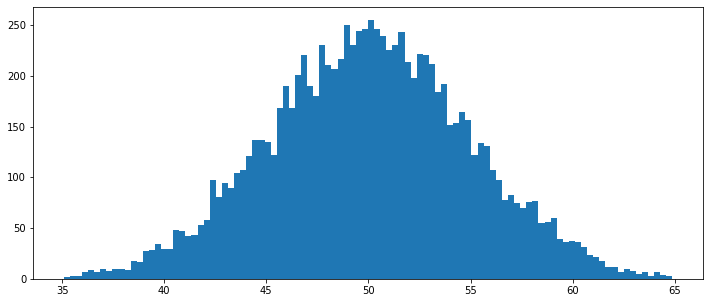

In [34]:
# remove outliers
# filter out those values from the sample that are not within the defined limits.

outliers_removed = [x for x in data if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))

plt.hist(outliers_removed, bins = 100)
plt.show()

## 4. Interquartile Range Method
Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the `Interquartile Range`, or `IQR` for short.

The IQR is calculated as the `*difference between the 75th and the 25th percentiles*` of the data and defines the box in a box and whisker plot.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

The IQR defines the middle 50% of the data, or the body of the data.

Statistics-based outlier detection techniques assume that the normal data points would appear in high probability regions of a stochastic model, while outliers would occur in the low probability regions of a stochastic model

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the `factor k is the value 1.5`. A `factor k of 3 or more` can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.

`Note`. *The approach can be used for multivariate data by calculating the limits on each variable in the dataset in turn, and taking outliers as observations that fall outside of the rectangle or hyper-rectangle*.

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Percentiles: lower=36.675, upper=63.370, cut_off=10.011
Identified outliers: 81
Non-outlier observations: 9919


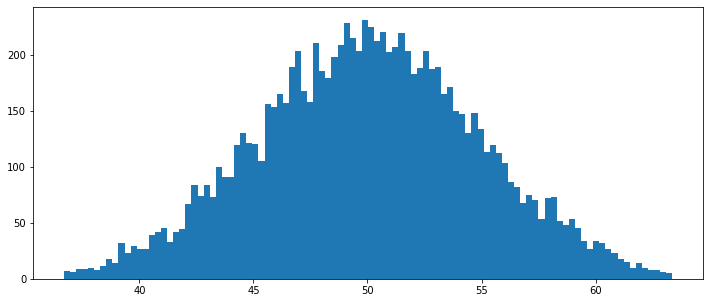

In [37]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(10000) + 50

# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Percentiles: lower=%.3f, upper=%.3f, cut_off=%.3f' % (lower, upper, cut_off))

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

plt.hist(outliers_removed, bins = 100)
plt.show()

## 5. Automatic Outlier Detection: LocalOutlierFactor
sklearn.neighbors.LocalOutlierFactor. [Here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html).


In machine learning, an approach to tackling the problem of outlier detection is [one-class classification](https://en.wikipedia.org/wiki/One-class_classification).

One-Class Classification, or OCC for short, involves fitting a model on the “normal” data and predicting whether new data is normal or an outlier/anomaly.

`A one-class classifier is fit on a training dataset that only has examples from the normal class. Once prepared, the model is used to classify new examples as either normal or not-normal, i.e. outliers or anomalies`.

A simple approach to identifying outliers is to locate those examples that are far from the other examples in the feature space.

This `can work well for feature spaces with low dimensionality (few features)`, although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.

The `local outlier factor, or LOF for short`, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood.

We will use the Boston housing regression problem that has 13 inputs and one numerical target and requires learning the relationship between suburb characteristics and house prices.

The dataset can be downloaded from here:

- [Boston Housing Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv) (housing.csv)
- [Boston Housing Dataset Details](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names) (housing.names)

In [41]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split

# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
datafile = '..\\..\\..\\data\\housing.csv'
df = read_csv(datafile, header=None)
df.shape

(506, 14)

In [42]:
# retrieve the array
data = df.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# summarize the shape of the dataset
print(X.shape, y.shape)

(506, 13) (506,)


In [43]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


It is a regression predictive modeling problem, meaning that we will be predicting a numeric value. All input variables are also numeric.

In this case, we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).

The complete example of evaluating a linear regression model on the dataset is listed below.

In [44]:
# evaluate model on the raw dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


In [ ]:
The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem, and that removing these outliers from the training set will allow a more effective model to be learned.

We can achieve this by defining the LocalOutlierFactor model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1). We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specifics of your dataset.

In [45]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
datafile = '..\\..\\..\\data\\housing.csv'
df = read_csv(datafile, header=None)

# retrieve the array
data = df.values

# split into inpiut and output elements
X, y = data[:, :-1], data[:, -1]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


## 6. Automatic Outlier Detection: IsolationForest.
sklearn.ensemble.IsolationForest. [Here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html).

## Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.

- Develop your own Gaussian test dataset and plot the outliers and non-outlier values on a histogram.
- Test out the IQR based method on a univariate dataset generated with a non-Gaussian distribution.
- Choose one method and create a function that will filter out outliers for a given dataset with an arbitrary number of dimensions.

## Summary
Specifically, you learned:

- That an outlier is an unlikely observation in a dataset and may have one of many causes.
- How to use simple univariate statistics like standard deviation and interquartile range to identify and remove outliers from a data sample.
- How to use an outlier detection model to identify and remove rows from a training dataset in order to lift predictive modeling performance.

## Notes

- Once i remove the outlier, how can i fill the space left by that outlier. Becuase in other features the length is more than in outlier removed features. `the value in the record could be removed, and then imputed` [Here](https://machinelearningmastery.com/handle-missing-data-python/).

- I have data where the standard deviation is very close to the mean. So when I do the : [lower = mean – cutoff] it gives me a negative number. `methods is not suitable for your data`

- Data needs to be standardized first, are you referring to data transformation. `Standardization` explicitly, `zero mean` and `unit standard` deviation.
